In [108]:
import numpy as np 
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

data = pd.read_csv(r'C:\Users\DELL\Desktop\AI ML\DATA SETS\logisticRegressionDataset.csv',header=None)
print(data.shape)
data.head()

(100, 4)


,0,1,2,3
0,0,5.1,3.5,1
1,1,4.9,3.0,1
2,2,4.7,3.2,1
3,3,4.6,3.1,1
4,4,5.0,3.6,1


In [109]:
x_orig = data.iloc[:,1:-1].values
y_orig = data.iloc[:,-1].values
print("Shape of feature matrix : ",x_orig.shape)
print("Shape of label vector : ",y_orig.shape)

Shape of feature matrix :  (100, 2)
Shape of label vector :  (100,)


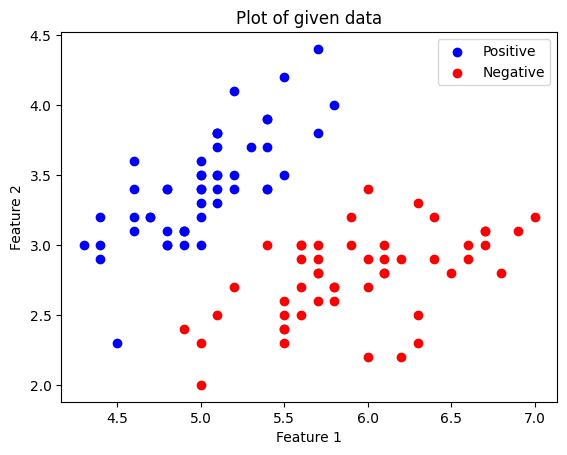

In [110]:
x_pos = np.array([x_orig[i] for i in range(len(x_orig))
                                if y_orig[i]==1])
x_neg = np.array([x_orig[i] for i in range(len(x_orig))
                                if y_orig[i]==0])
plt.scatter(x_pos[:,0],x_pos[:,1],color='blue',label='Positive')
plt.scatter(x_neg[:,0],x_neg[:,1],color='red',label='Negative')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Plot of given data')
plt.legend()
plt.show()

In [111]:
oneHot = OneHotEncoder()
oneHot.fit(x_orig)
x = oneHot.transform(x_orig).toarray()
y_orig = y_orig.reshape(-1,1)
oneHot.fit(y_orig)
y=oneHot.transform(y_orig).toarray()
alpha,epochs = 0.0035,500
m,n = x.shape
print([m,n,alpha,epoch])

[100, 51, 0.0035, 5]


In [112]:
tfcv1 = tf.compat.v1
tfcv1.disable_eager_execution()
X = tfcv1.placeholder(tf.float32,[None,n])
Y = tfcv1.placeholder(tf.float32,[None,2])
W = tf.Variable(tf.zeros([n,2]))
b = tf.Variable(tf.zeros([2]))

In [113]:
#hypothesis
Y_hat = tf.nn.sigmoid(tf.add(tf.matmul(X,W),b))
#sigmoid cross entropy cost function
cost = tf.nn.sigmoid_cross_entropy_with_logits(logits=Y_hat,labels=Y)
#gradient descent optimizer
optimizer = tfcv1.train.GradientDescentOptimizer(learning_rate=alpha).minimize(cost)
init = tfcv1.global_variables_initializer()

In [114]:
with tfcv1.Session() as sess:
    sess.run(init)
    cost_history,accuracy_history = [],[]
    for epoch in range(epochs):
        cost_per_epoch = 0
        sess.run(optimizer,feed_dict = {X:x,Y:y})
        c=sess.run(cost,feed_dict={X:x,Y:y})
        correct_prediction = tf.equal(tf.argmax(Y_hat,1),tf.argmax(Y,1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
        cost_history.append(sum(sum(c)))
        accuracy_history.append(accuracy.eval({X:x,Y:y})*100)
        if epoch%100 == 0 and epoch!=0:
            print("Epoch : ",str(epoch),"\tCost : ",str(cost_history[-1]))
    Weight = sess.run(W)
    bias = sess.run(b)
    correct_prediction = tf.equal(tf.argmax(Y_hat,1),tf.argmax(Y,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    print("\n Accuracy : ",accuracy_history[-1],"%")

Epoch :  100 	Cost :  136.33413696289062
Epoch :  200 	Cost :  132.68544006347656
Epoch :  300 	Cost :  129.771240234375
Epoch :  400 	Cost :  127.2939567565918

 Accuracy :  87.00000047683716 %


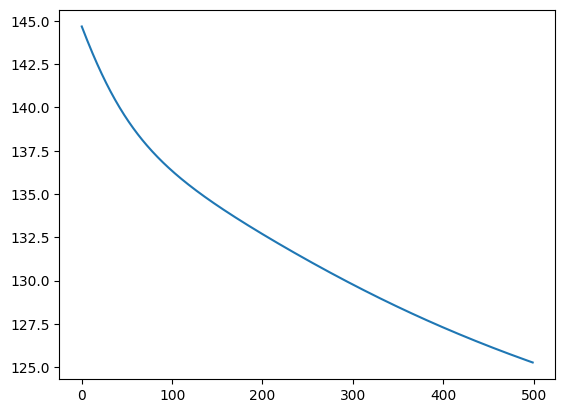

In [115]:
plt.plot(cost_history)